In [1]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd


df=pd.read_excel("housing.xls")
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(df.head())

      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


In [2]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['MEDV'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [3]:
lr=LinearRegression()
pr1=LinearRegression()
pr2=LinearRegression()
quadratic=PolynomialFeatures(degree=2)
quadratic=PolynomialFeatures(degree=3)

X_quard=quadratic.fit_transform(X_train)
X_quard1=quadratic.fit_transform(X_train)

lr.fit(X_train,y_train)
pr1.fit(X_quard,y_train)
pr2.fit(X_quard1,y_train)



X_fit=(X_train,y_train)
y_lin_fit=lr.predict(X_test)
y_quard_fit=pr1.predict(quadratic.fit_transform(X_test))
y_quard1_fit=pr2.predict(quadratic.fit_transform(X_test))


In [4]:
y_lin_pred=lr.predict(X_test)
y_quard_pred=pr1.predict(quadratic.fit_transform(X_test))
y_quard1_pred=pr2.predict(quadratic.fit_transform(X_test))

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Tranning MSE linear : %.3f, Quardactic : %.3f, Quardactic1 : %.3f'%(mean_squared_error(y_test,y_lin_pred),mean_squared_error(y_test,y_quard_pred),mean_squared_error(y_test,y_quard1_pred)))

print(' Tranning R2 linear : %.3f,Quardactic : %.3f, Quardactic 1 : %.3f'%(r2_score(y_test,y_lin_pred),r2_score(y_test,y_quard_pred),r2_score(y_test,y_quard1_pred)))
      

Tranning MSE linear : 25.044, Quardactic : 17808.159, Quardactic1 : 17808.159
 Tranning R2 linear : 0.687,Quardactic : -221.470, Quardactic 1 : -221.470


In [5]:
from sklearn.tree import DecisionTreeRegressor
t=DecisionTreeRegressor(max_depth=3)
t.fit(X_train,y_train)
t_pred=t.predict(X_test)

print("MSE: ",mean_squared_error(y_test,t_pred))
print("R2 :",r2_score(y_test,t_pred))



MSE:  23.1586487314844
R2 : 0.7106891331741347


ValueError: x and y must be the same size

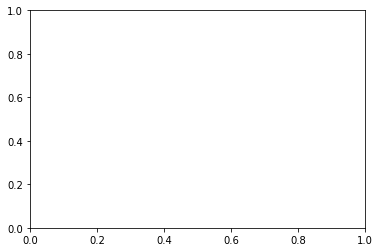

In [13]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_train=train_test_split(X,y,test_size=0.5,random_state=0)


plt.scatter(X_test,y_test,label='Training Points')
plt.plot(X_test,y_lin_fit,label='Linear Fit',linestyle='-')
plt.plot(X_test,y_quard_fit,label='Quadratic Fit1(d=2)')
plt.plot(X_test,y_quard1_fit,label='Quadratic Fit2(d=3)')
plt.legend(loc='upper left')
plt.show()

In [1]:
from matplotlib import pyplot as plt
#plt.scatter(X_test,y_test,label='testing points')
plt.plot(X_test,y_lin_fit,label='linear fit ',linestyle='--')

plt.plot(X_test,y_quard_fit,label='quadratic fit')
plt.plot(X_test,y_quard1_fit,label='quadratic 1 fit')
#plt.legend(loc='upper left')
plt.show()




NameError: name 'X_test' is not defined